<a href="https://colab.research.google.com/github/Tanvir007/Deep-Learning-for-Sewage-Treatment-Plant/blob/main/DTP06_LightGBM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load the data from CSV file
data = pd.read_csv('/content/drive/MyDrive/BUET Thesis/DSTP day month year.csv')

In [ ]:
# Select features and target
selected_features = ['day', 'month', 'year','InQuantitySLSMLD','InpH', 'InCOD', 'InBOD', 'InAmmonia', 'InSS', 'InPhosphate', 'InFecalColiform','EfpH','EfCOD','EfBOD','EfAmmonia','EfSS','EfPhosphate','EfFecalColiform'	]

X = data[selected_features]
y = data['EfDischargetoGojariaMLD']

In [ ]:
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the LightGBM Regression model
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute percentage error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 191, number of used features: 18
[LightGBM] [Info] Start training from score 354.356492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
# Print the evaluation metrics
print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)
print("MAE (Train):", mae_train)
print("MAE (Test):", mae_test)
print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

RMSE (Train): 7.148492726054263
RMSE (Test): 19.486688572473263
MAE (Train): 4.26275998736816
MAE (Test): 12.383849388074374
MAPE (Train): 1.220544586260851
MAPE (Test): 3.22663033151544
R-squared (Train): 0.9790001702162414
R-squared (Test): 0.8549433537241401


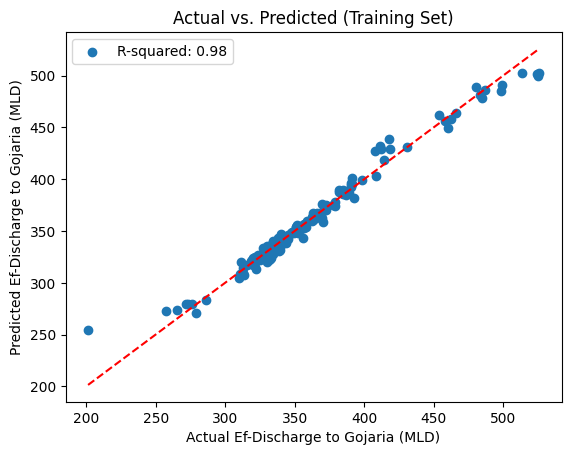

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for training set
plt.scatter(y_train, y_train_pred, label=f"R-squared: {r2_train:.2f}")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel("Actual Ef-Discharge to Gojaria (MLD)")
plt.ylabel("Predicted Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.title("Actual vs. Predicted (Training Set)")
plt.show()


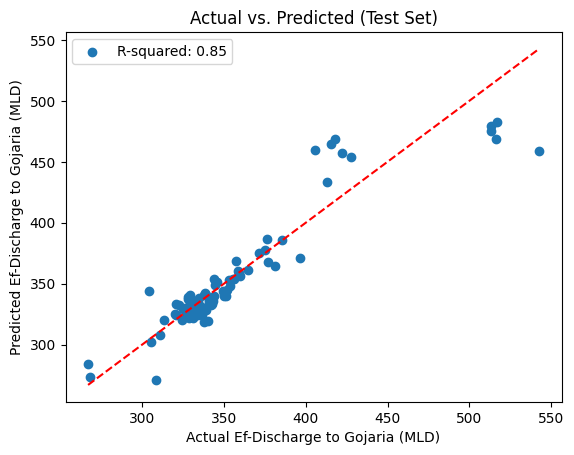

In [ ]:
# Scatter plot for test set
plt.scatter(y_test, y_test_pred, label=f"R-squared: {r2_test:.2f}")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Ef-Discharge to Gojaria (MLD)")
plt.ylabel("Predicted Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.title("Actual vs. Predicted (Test Set)")
plt.show()


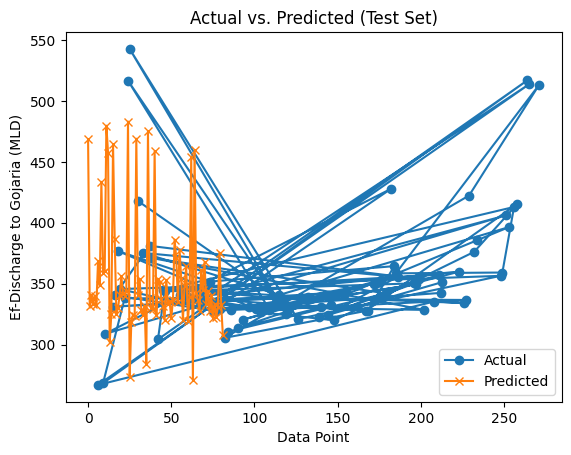

In [ ]:
# Line plot for actual and predicted values
plt.plot(y_test, label="Actual", marker='o')
plt.plot(y_test_pred, label="Predicted", marker='x')
plt.xlabel("Data Point")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.title("Actual vs. Predicted (Test Set)")
plt.show()


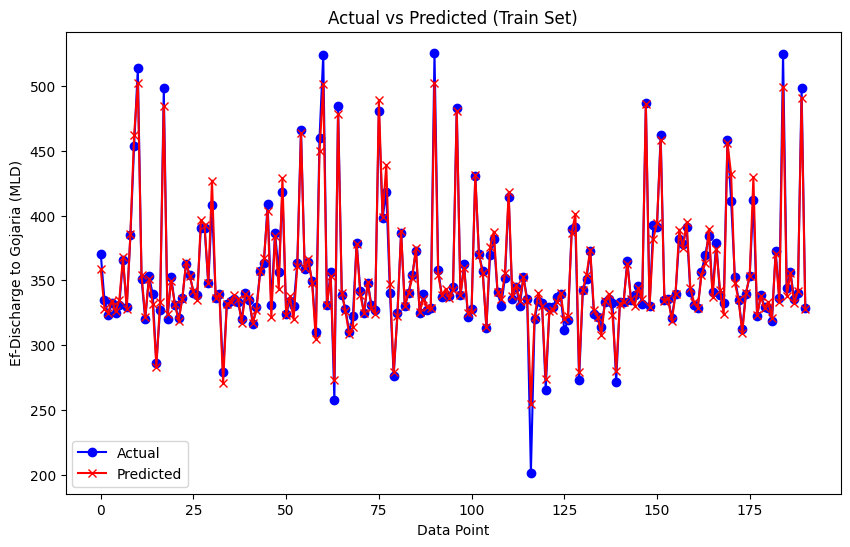

In [ ]:
# Line plot for actual and predicted values (Train Set)
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label="Actual", marker='o', color='blue')
plt.plot(range(len(y_train_pred)), y_train_pred, label="Predicted", marker='x', color='red')
plt.xlabel("Data Point")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.title("Actual vs Predicted (Train Set)")
plt.legend()
plt.show()

In [ ]:
# Create a DataFrame for the next 7 days (adjust the feature values accordingly)
next_7_days_data = pd.DataFrame({
    "day": [25, 26, 27, 28, 29, 30, 1],  # Replace with the day of each future date
    "month": [6, 6, 6, 6, 6, 6, 7],    # Replace with the month of each future date
    "year": [2023, 2023, 2023, 2023, 2023, 2023, 2023],  # Replace with the year of each future date
    # Add values for other features as needed
    "InQuantitySLSMLD": [530,537,490,430,450,470,527],
    "InpH": [7.8,8.9,8.1,9.4,3.5,10.1,8.2],
    "InCOD":[280,291,310,425,411,510,297],
    "InBOD":[310,333,358,410,419,391,299],
    "InAmmonia":[29,24,27,26,31,35,29],
    "InSS":[150,170,159,139,145,151,131],
    "InPhosphate":[4,3,4,3.55,4.87,3.99,3.11],
    "InFecalColiform":[4600,3999,4001,4500,4870,5001,5500],
    "EfpH": [7.2,7.5,7.5,7.9,6.5,7.1,7.2],
    "EfCOD":[8,9,10,5,11,10,7],
    "EfBOD":[1.5,1.3,1.58,2.10,2.19,2.91,2.99],
    "EfAmmonia":[.29,.24,.27,.26,.31,.35,.29],
    "EfSS":[2,1,1,9,5,5.1,9],
    "EfPhosphate":[1.4,1.3,1.4,1.355,1.487,1.399,1.311],
    "EfFecalColiform":[46,39,40,45,48,50,55]
})

# Predict Ef-Discharge to Gojaria for the next 7 days
next_7_days_predictions = model.predict(next_7_days_data)

# Create a table of predictions
predictions_table = pd.DataFrame({
    'Date': pd.to_datetime(next_7_days_data[['day', 'month', 'year']]),
    'Predicted Ef-Discharge (MLD)': next_7_days_predictions
})

# Print the table
print(predictions_table)


        Date  Predicted Ef-Discharge (MLD)
0 2023-06-25                    460.112468
1 2023-06-26                    473.183670
2 2023-06-27                    464.700839
3 2023-06-28                    460.722542
4 2023-06-29                    461.241825
5 2023-06-30                    465.056878
6 2023-07-01                    453.007484


In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Calculate the regular R-squared for the training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of data points (n) and predictors (k)
n = len(X_train)
k = X_train.shape[1]

# Calculate the residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate the AIC, HQIC, and BIC
def calculate_information_criteria(residuals, n, k, criterion):
    sse = np.sum(residuals**2)
    if criterion == "AIC":
        return 2 * k - 2 * np.log(sse)
    elif criterion == "HQIC":
        return 2 * k - 2 * np.log(sse) + 2 * k * (k + 1) / (n - k - 1)
    elif criterion == "BIC":
        return n * np.log(sse / n) + k * np.log(n)
    else:
        return None

train_aic = calculate_information_criteria(train_residuals, n, k, "AIC")
test_aic = calculate_information_criteria(test_residuals, n, k, "AIC")

train_hqic = calculate_information_criteria(train_residuals, n, k, "HQIC")
test_hqic = calculate_information_criteria(test_residuals, n, k, "HQIC")

train_bic = calculate_information_criteria(train_residuals, n, k, "BIC")
test_bic = calculate_information_criteria(test_residuals, n, k, "BIC")

# Calculate the adjusted R-squared for training and testing sets
adjusted_train_r2 = 1 - (1 - train_r2) * (n - 1) / (n - k - 1)
adjusted_test_r2 = 1 - (1 - test_r2) * (n - 1) / (n - k - 1)

print(f"AIC (Training Set): {train_aic:.4f}")
print(f"AIC (Testing Set): {test_aic:.4f}")
print(f"HQIC (Training Set): {train_hqic:.4f}")
print(f"HQIC (Testing Set): {test_hqic:.4f}")
print(f"BIC (Training Set): {train_bic:.4f}")
print(f"BIC (Testing Set): {test_bic:.4f}")
print(f"Adjusted R-squared (Training Set): {adjusted_train_r2:.4f}")
print(f"Adjusted R-squared (Testing Set): {adjusted_test_r2:.4f}")

AIC (Training Set): 17.6278
AIC (Testing Set): 15.3076
HQIC (Training Set): 21.6046
HQIC (Testing Set): 19.2844
BIC (Training Set): 845.8973
BIC (Testing Set): 1067.4775
Adjusted R-squared (Training Set): 0.9768
Adjusted R-squared (Testing Set): 0.8398


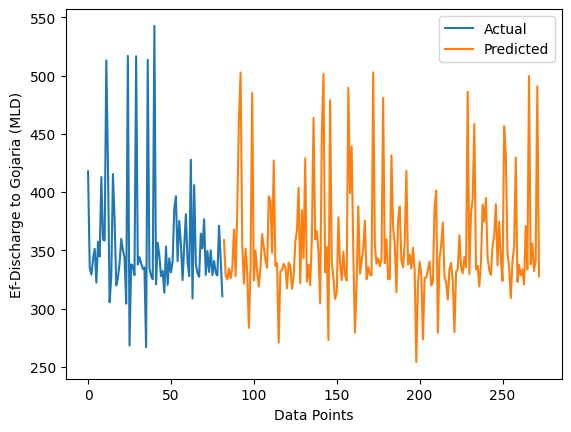

In [ ]:
# Line plot for actual and predicted values
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(y_test), len(y_test) + len(y_train_pred)), y_train_pred, label="Predicted")
plt.xlabel("Data Points")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.show()

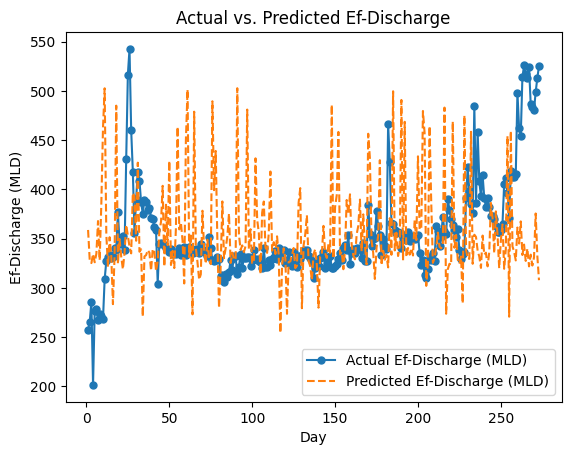

In [ ]:
# Create an array of day numbers for the x-axis
days = np.arange(1, len(data) + 1)

# Create a line plot
plt.plot(days, y, label="Actual Ef-Discharge (MLD)", marker='o', markersize=5)
plt.plot(days, np.concatenate((y_train_pred, y_test_pred)), label="Predicted Ef-Discharge (MLD)", linestyle='--')
plt.xlabel("Day")
plt.ylabel("Ef-Discharge (MLD)")
plt.title("Actual vs. Predicted Ef-Discharge")
plt.legend()
plt.show()